Implementar los problemas 3, 4 y 6 de la práctica 2 utilizando Keras.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.datasets import cifar10

%matplotlib inline

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

ytrain = ytrain[:,0]
ytest = ytest[:,0]

Xtrain = Xtrain.astype(float)
Xtest = Xtest.astype(float)

m = Xtrain.shape[0]
n = Xtrain[0].size

mu = np.mean(Xtrain, axis=0)
std = np.std(Xtrain, axis=0)

Xtrain -= mu
Xtrain /= std
Xtest -= mu
Xtest /= std

#Xtrain = np.reshape(Xtrain, (m, n))
#Xtest = np.reshape(Xtest, (Xtest.shape[0],))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


In [3]:
#Los paso a categorical para que quede bien definida la loss y la metrica
ytrain = tf.keras.utils.to_categorical(ytrain, 10)
ytest = tf.keras.utils.to_categorical(ytest, 10)
ytrain.shape

(50000, 10)

Ej. 3

In [13]:
def scheduler(epoch, lr):
  if epoch == 10 or epoch==25:
    return lr/5
  else:
    return lr


callbacks_list=[
    tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=0
    )
]

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=.005)

input = tf.keras.layers.Input(shape=(32,32,3))
flat = tf.keras.layers.Flatten()(input)
l1 = tf.keras.layers.Dense(100, activation='relu', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(5e-3))(flat)
output = tf.keras.layers.Dense(10, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(5e-3))(l1)

model = tf.keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               307300    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
hist3 = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=50, 
                  callbacks=callbacks_list, batch_size=128, verbose=2)

Epoch 1/50
391/391 - 3s - loss: 1.8887 - accuracy: 0.1821 - val_loss: 0.3950 - val_accuracy: 0.2654 - lr: 0.0050 - 3s/epoch - 8ms/step
Epoch 2/50
391/391 - 3s - loss: 0.2726 - accuracy: 0.2485 - val_loss: 0.1633 - val_accuracy: 0.3111 - lr: 0.0050 - 3s/epoch - 6ms/step
Epoch 3/50
391/391 - 3s - loss: 0.1410 - accuracy: 0.3156 - val_loss: 0.1245 - val_accuracy: 0.3111 - lr: 0.0050 - 3s/epoch - 7ms/step
Epoch 4/50
391/391 - 3s - loss: 0.1135 - accuracy: 0.3518 - val_loss: 0.1034 - val_accuracy: 0.3816 - lr: 0.0050 - 3s/epoch - 7ms/step
Epoch 5/50
391/391 - 3s - loss: 0.0984 - accuracy: 0.3813 - val_loss: 0.0939 - val_accuracy: 0.3845 - lr: 0.0050 - 3s/epoch - 6ms/step
Epoch 6/50
391/391 - 3s - loss: 0.0907 - accuracy: 0.3957 - val_loss: 0.0870 - val_accuracy: 0.4124 - lr: 0.0050 - 3s/epoch - 7ms/step
Epoch 7/50
391/391 - 3s - loss: 0.0861 - accuracy: 0.3987 - val_loss: 0.0843 - val_accuracy: 0.4088 - lr: 0.0050 - 3s/epoch - 7ms/step
Epoch 8/50
391/391 - 3s - loss: 0.0838 - accuracy: 0.40

Ej. 4

In [9]:
opt2 = tf.keras.optimizers.Adam(learning_rate=.001)

input = tf.keras.layers.Input(shape=(32,32,3))
flat = tf.keras.layers.Flatten()(input)
l1 = tf.keras.layers.Dense(100, activation='sigmoid', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(flat)
output = tf.keras.layers.Dense(10, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.L2(1e-3))(l1)

model2 = tf.keras.Model(inputs=input, outputs=output)

model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               307300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.compile(optimizer=opt2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist4 = model2.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=50, batch_size=128, verbose=2)

Epoch 1/50
391/391 - 6s - loss: 1.9506 - accuracy: 0.3809 - val_loss: 1.8275 - val_accuracy: 0.4130 - 6s/epoch - 15ms/step
Epoch 2/50
391/391 - 5s - loss: 1.7920 - accuracy: 0.4226 - val_loss: 1.7998 - val_accuracy: 0.4115 - 5s/epoch - 12ms/step
Epoch 3/50
391/391 - 5s - loss: 1.7542 - accuracy: 0.4310 - val_loss: 1.7556 - val_accuracy: 0.4338 - 5s/epoch - 12ms/step
Epoch 4/50
391/391 - 5s - loss: 1.7379 - accuracy: 0.4411 - val_loss: 1.7650 - val_accuracy: 0.4218 - 5s/epoch - 12ms/step
Epoch 5/50
391/391 - 5s - loss: 1.7289 - accuracy: 0.4407 - val_loss: 1.7541 - val_accuracy: 0.4346 - 5s/epoch - 12ms/step
Epoch 6/50
391/391 - 5s - loss: 1.7172 - accuracy: 0.4485 - val_loss: 1.7447 - val_accuracy: 0.4371 - 5s/epoch - 12ms/step
Epoch 7/50
391/391 - 5s - loss: 1.7121 - accuracy: 0.4500 - val_loss: 1.7490 - val_accuracy: 0.4289 - 5s/epoch - 13ms/step
Epoch 8/50
391/391 - 5s - loss: 1.7043 - accuracy: 0.4532 - val_loss: 1.7353 - val_accuracy: 0.4407 - 5s/epoch - 14ms/step
Epoch 9/50
391/3

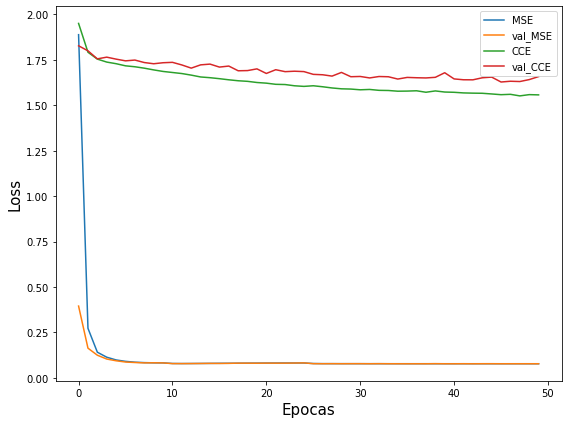

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(hist3.history['loss'], label='MSE')
plt.plot(hist3.history['val_loss'], label='val_MSE')
plt.plot(hist4.history['loss'], label='CCE')
plt.plot(hist4.history['val_loss'], label='val_CCE')
plt.xlabel('Epocas', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

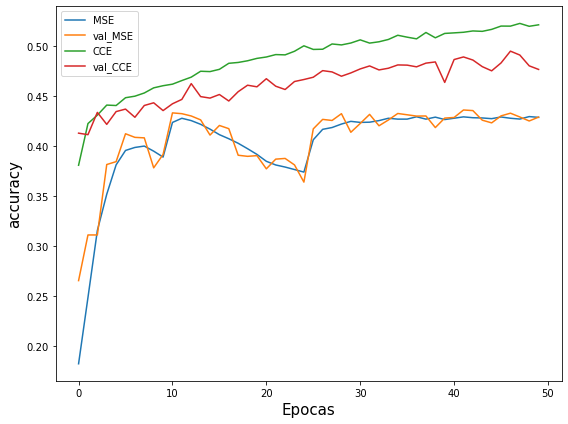

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(hist3.history['accuracy'], label='MSE')
plt.plot(hist3.history['val_accuracy'], label='val_MSE')
plt.plot(hist4.history['accuracy'], label='CCE')
plt.plot(hist4.history['val_accuracy'], label='val_CCE')
plt.xlabel('Epocas', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Ej. 6